In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.utils.validation import column_or_1d
from csv import DictReader
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sn
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold


from scipy.stats import loguniform


In [2]:
ds = pd.read_csv('/Users/Blanche/Desktop/ml_project2/Code/dataSetForML.csv')

In [3]:
print(ds.head())

   Unnamed: 0  orientation_art  progvscons_art  vote  orientation_dep  \
0           0               -1              -1  -1.0         0.428571   
1           1               -1              -1   1.0         0.428571   
2           2               -1              -1   1.0         0.428571   
3           3               -1              -1   1.0         0.428571   
4           4                0               1   1.0         0.428571   

   progvscons_dep  Genre_F  Genre_H  Âge_18-30  Âge_30-45  ...  group_AdG  \
0        0.368421        0        1          0          0  ...          0   
1        0.368421        0        1          0          0  ...          0   
2        0.368421        0        1          0          0  ...          0   
3        0.368421        0        1          0          0  ...          0   
4        0.368421        0        1          0          0  ...          0   

   group_CSPO  group_CVPO  group_INDEP  group_LES VERTS  group_PDC  \
0           0           1   

# Feature Engineering

In [4]:
print(np.isnan(ds).any(axis=0))

Unnamed: 0                 False
orientation_art            False
progvscons_art             False
vote                        True
orientation_dep            False
progvscons_dep             False
Genre_F                    False
Genre_H                    False
Âge_18-30                  False
Âge_30-45                  False
Âge_45-65                  False
Âge_65+                    False
District_Brig              False
District_Conthey           False
District_Entremont         False
District_Goms              False
District_Hérens            False
District_Leuk              False
District_Martigny          False
District_Monthey           False
District_Sierre            False
District_Sion              False
District_St-Maurice        False
District_Visp              False
District_Westlich Raron    False
District_Östlich Raron     False
group_AC                   False
group_AdG                  False
group_CSPO                 False
group_CVPO                 False
group_INDE

Il y a des NaN dans la colonne 'vote' <br/>
Cela signifie que certains députés n'ont pas voté pour certains articles <br/>
On supprime donc ces lignes

In [5]:
ds = ds[~np.isnan(ds).any(axis=1)]

In [6]:
print(ds['vote'])

0      -1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5320   -1.0
5321   -1.0
5322   -1.0
5323   -1.0
5324    1.0
Name: vote, Length: 4753, dtype: float64


Delete the row if the value of 'vote' is 0 (it means that the deputee voted blank)

In [7]:
ds = ds[ds['vote'] != 0]

In [8]:
print(ds['vote'])

0      -1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5320   -1.0
5321   -1.0
5322   -1.0
5323   -1.0
5324    1.0
Name: vote, Length: 4588, dtype: float64


In [9]:
print(np.isnan(ds).any(axis=0))

Unnamed: 0                 False
orientation_art            False
progvscons_art             False
vote                       False
orientation_dep            False
progvscons_dep             False
Genre_F                    False
Genre_H                    False
Âge_18-30                  False
Âge_30-45                  False
Âge_45-65                  False
Âge_65+                    False
District_Brig              False
District_Conthey           False
District_Entremont         False
District_Goms              False
District_Hérens            False
District_Leuk              False
District_Martigny          False
District_Monthey           False
District_Sierre            False
District_Sion              False
District_St-Maurice        False
District_Visp              False
District_Westlich Raron    False
District_Östlich Raron     False
group_AC                   False
group_AdG                  False
group_CSPO                 False
group_CVPO                 False
group_INDE

In [10]:
# Divide into features and labels 

X_data = ds.iloc[:, 1:37]
X_data = X_data.drop('vote', axis=1)

Labels = ds.iloc[:, [3]]

In [11]:
print(Labels)

      vote
0     -1.0
1      1.0
2      1.0
3      1.0
4      1.0
...    ...
5320  -1.0
5321  -1.0
5322  -1.0
5323  -1.0
5324   1.0

[4588 rows x 1 columns]


In [12]:
# Split the dataset (20% as test set)

X_train, X_test, y_train, y_test = train_test_split(X_data, Labels, test_size=0.2, random_state=0)

# Logistic Regression

In [12]:
# Train the model : logistic Regression
y_train = np.ravel(y_train)

model = LogisticRegression(solver='liblinear', random_state=0)
H = model.fit(X_train, y_train)


In [13]:
print(X_train.columns)
print(model.coef_)

Index(['orientation_art', 'progvscons_art', 'orientation_dep',
       'progvscons_dep', 'Genre_F', 'Genre_H', 'Âge_18-30', 'Âge_30-45',
       'Âge_45-65', 'Âge_65+', 'District_Brig', 'District_Conthey',
       'District_Entremont', 'District_Goms', 'District_Hérens',
       'District_Leuk', 'District_Martigny', 'District_Monthey',
       'District_Sierre', 'District_Sion', 'District_St-Maurice',
       'District_Visp', 'District_Westlich Raron', 'District_Östlich Raron',
       'group_AC', 'group_AdG', 'group_CSPO', 'group_CVPO', 'group_INDEP',
       'group_LES VERTS', 'group_PDC', 'group_SVPO', 'group_UDC', 'group_VLR',
       'group_ZUK-VS'],
      dtype='object')
[[ 6.60137520e-02 -3.01326869e-01 -8.74842786e-02 -6.80389740e-01
   2.55989971e-05  1.76566453e-02  2.89908252e-02  3.03231494e-03
  -1.84605573e-02  4.11966143e-03  1.88486044e-01  4.84528205e-04
   7.66739647e-02  3.91607864e-03  2.65896946e-01  3.51738496e-02
  -3.44639351e-02  5.00509299e-02 -2.69547654e-02 -2.880983

In [14]:
print('Logistic Regression Model Coeff (m) =' , model.coef_)
print('Logistic Regression Model Coeff (b) =' , model.intercept_)

Logistic Regression Model Coeff (m) = [[ 6.60137520e-02 -3.01326869e-01 -8.74842786e-02 -6.80389740e-01
   2.55989971e-05  1.76566453e-02  2.89908252e-02  3.03231494e-03
  -1.84605573e-02  4.11966143e-03  1.88486044e-01  4.84528205e-04
   7.66739647e-02  3.91607864e-03  2.65896946e-01  3.51738496e-02
  -3.44639351e-02  5.00509299e-02 -2.69547654e-02 -2.88098350e-02
   1.84971617e-02  5.59189689e-04 -1.57029892e-01 -3.74798021e-01
  -1.82142327e-01 -1.01749757e-01  3.85849230e-01  3.33225713e-02
  -3.74798021e-01 -2.14125246e-01  7.62041924e-01 -2.87982171e-02
  -3.07141683e-01  3.64492084e-01 -3.19268314e-01]]
Logistic Regression Model Coeff (b) = [0.01768224]


In [15]:
# Predicting the data

y_predict=model.predict(X_test)
print(y_predict)

[ 1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.
  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.
 -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.
  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.
  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.
  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [16]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, model.predict(X_test)))


Confusion Matrix : 
 [[108 267]
 [ 87 456]]


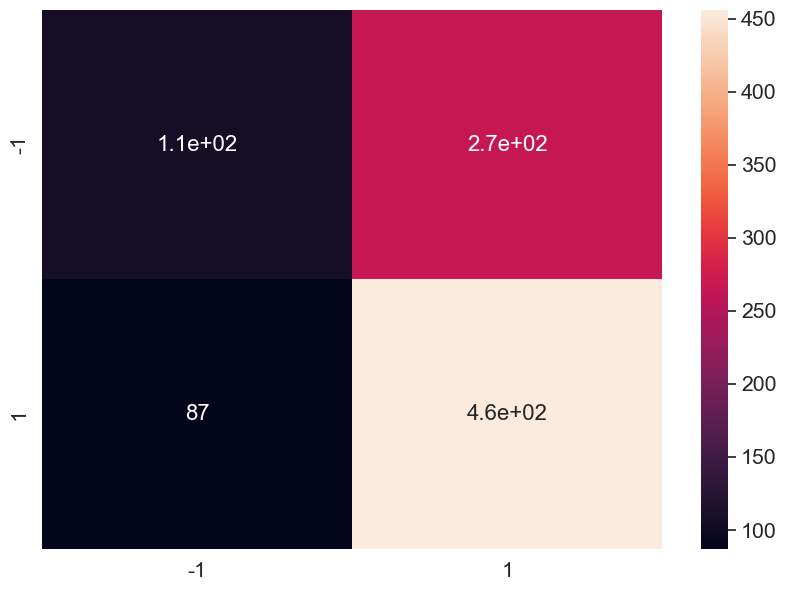

In [17]:
# Plot Confusion Matrix 

cm = confusion_matrix(y_test, model.predict(X_test))

df_cm = pd.DataFrame(cm,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()



In [18]:
# Print Classification Report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.55      0.29      0.38       375
         1.0       0.63      0.84      0.72       543

    accuracy                           0.61       918
   macro avg       0.59      0.56      0.55       918
weighted avg       0.60      0.61      0.58       918



# K-Nearest Neighbors 

In [21]:
# Train the KNN classifier on the training data
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(X_train, y_train)

# Evaluate the classifier on the test data
score = classifier.score(X_test, y_test)

In [19]:
print(score)

0.7342047930283224


In [22]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, classifier.predict(X_test)))


Confusion Matrix : 
 [[247 128]
 [116 427]]


In [23]:
# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.7777777777777778


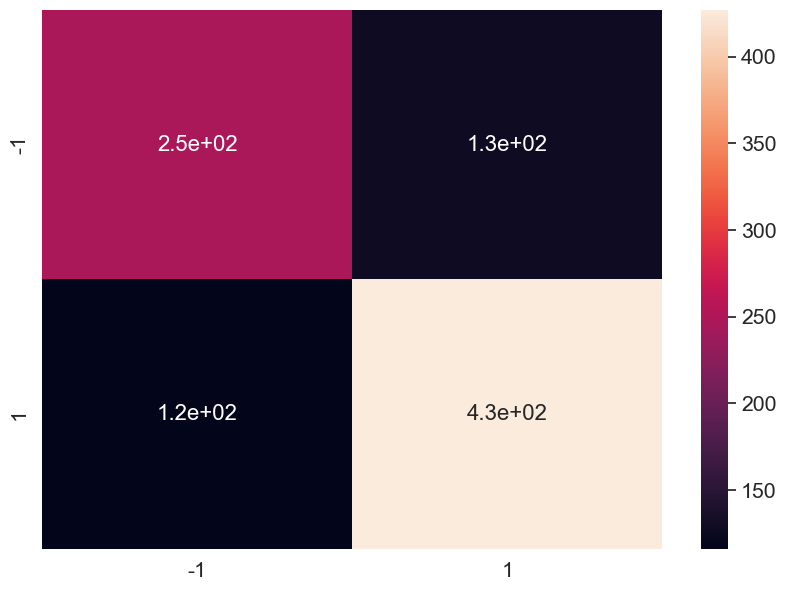

In [24]:
# Plot Confusion Matrix 

cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [25]:
# Print Classification Report

print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.68      0.66      0.67       375
         1.0       0.77      0.79      0.78       543

    accuracy                           0.73       918
   macro avg       0.72      0.72      0.72       918
weighted avg       0.73      0.73      0.73       918



# Decision Tree

In [26]:
# Train the decision tree classifier on the training data
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.7597765363128492


In [31]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, tree_classifier.predict(X_test)))


Confusion Matrix : 
 [[252 123]
 [135 408]]


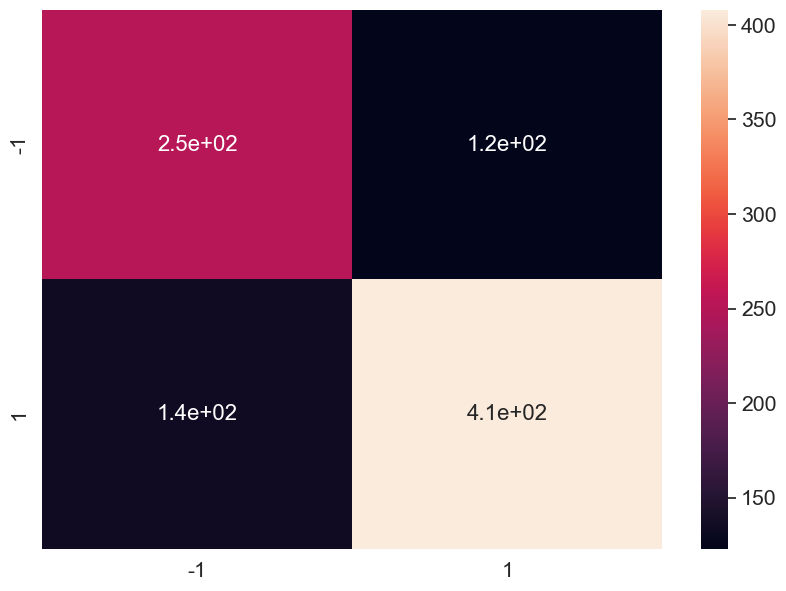

In [28]:
# Compute the confusion matrix
cm_tree = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_tree,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [29]:
# Print Classification Report

print(classification_report(y_test, tree_classifier.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.65      0.67      0.66       375
         1.0       0.77      0.75      0.76       543

    accuracy                           0.72       918
   macro avg       0.71      0.71      0.71       918
weighted avg       0.72      0.72      0.72       918



# Support Vector Machine

In [32]:
# Train the decision tree classifier on the training data
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.8218243819266836


In [33]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, svm_classifier.predict(X_test)))


Confusion Matrix : 
 [[227 148]
 [ 61 482]]


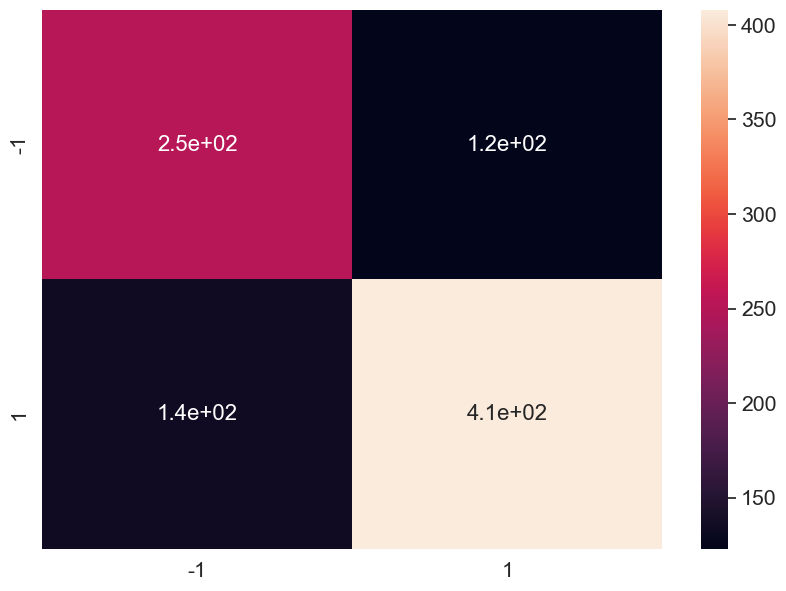

In [34]:
# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_tree,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [35]:
# Print Classification Report

print(classification_report(y_test, svm_classifier.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.79      0.61      0.68       375
         1.0       0.77      0.89      0.82       543

    accuracy                           0.77       918
   macro avg       0.78      0.75      0.75       918
weighted avg       0.77      0.77      0.77       918



# Naive Bayes

In [37]:
# Train the decision tree classifier on the training data
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bayes_classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.6996587030716724


In [38]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, bayes_classifier.predict(X_test)))


Confusion Matrix : 
 [[156 219]
 [133 410]]


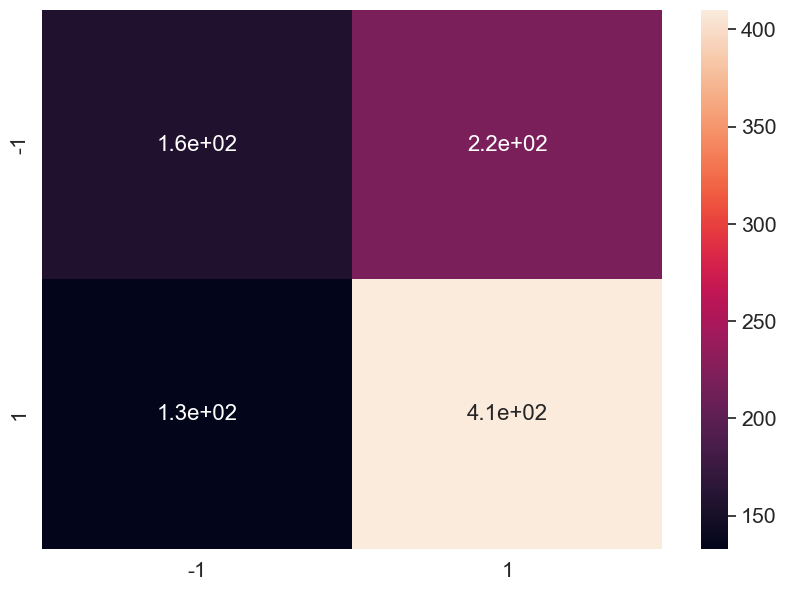

In [39]:
# Compute the confusion matrix
cm_bayes = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_bayes,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [40]:
# Print Classification Report

print(classification_report(y_test, bayes_classifier.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.54      0.42      0.47       375
         1.0       0.65      0.76      0.70       543

    accuracy                           0.62       918
   macro avg       0.60      0.59      0.58       918
weighted avg       0.61      0.62      0.61       918



# Gradient Boosting

In [13]:
# Train a gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

/usr/local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score: 0.8220120378331901


In [14]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, gbc.predict(X_test)))


Confusion Matrix : 
 [[233 142]
 [ 65 478]]


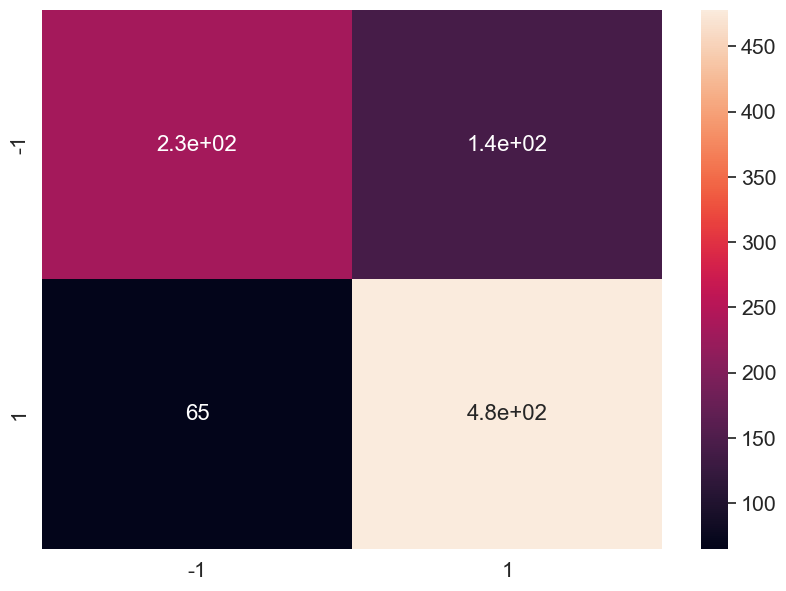

In [15]:
# Compute the confusion matrix
cm_bayes = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_bayes,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [16]:
# Print Classification Report

print(classification_report(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.78      0.62      0.69       375
         1.0       0.77      0.88      0.82       543

    accuracy                           0.77       918
   macro avg       0.78      0.75      0.76       918
weighted avg       0.78      0.77      0.77       918



# K-fold crossvalidation

In [18]:
# Create a dictionary with duplicate keys
data = {"a": 1, "b": 2, "c": 3, "a": 4}

# Get the keys in the dictionary
keys = data.keys()

# Create a set of unique keys
unique_keys = set(keys)

# Create a new dictionary with the unique keys
unique_data = {key: data[key] for key in unique_keys}

# Create a DataFrame from the new dictionary
df = pd.DataFrame(unique_data)

ValueError: If using all scalar values, you must pass an index

In [13]:
print(Labels)

      vote
0     -1.0
1      1.0
2      1.0
3      1.0
4      1.0
...    ...
5320  -1.0
5321  -1.0
5322  -1.0
5323  -1.0
5324   1.0

[4588 rows x 1 columns]


In [17]:
Labels = Labels.reset_index(drop=True)

In [21]:
print(Labels.loc[[132]])
print(Labels.loc[[131]])

     vote
132   1.0
     vote
131   1.0


In [18]:
# Create a k-fold cross-validation iterator
gbc_kfold = GradientBoostingClassifier()

kfold = KFold(n_splits=10)


# Check which rows are duplicates
duplicates = X_data.duplicated()

# Print the rows that are duplicates
print(X_data[duplicates])

# Remove the duplicate rows
X_data = X_data.drop_duplicates()

X_data.reset_index(inplace=True)

print(X_data.head())
print(Labels.head())

# Loop through the k folds and fit the model on each train fold
# and evaluate it on the corresponding test fold
for train_indices, test_indices in kfold.split(X_data):
  X_train = X_data.loc[train_indices, :], 
  y_train = Labels.loc[train_indices, :]
  X_test = X_data.loc[test_indices, :]
  y_test = Labels.loc[test_indices, :]
  gbc_kfold.fit(X_train, y_train)
  print(gbc_kfold.score(X_test, y_test))

      orientation_art  progvscons_art  orientation_dep  progvscons_dep  \
1                  -1              -1         0.428571        0.368421   
2                  -1              -1         0.428571        0.368421   
3                  -1              -1         0.428571        0.368421   
5                   0               1         0.428571        0.368421   
9                  -1              -1         0.428571        0.368421   
...               ...             ...              ...             ...   
5320                0              -1         0.500000        0.541667   
5321                0              -1         0.500000        0.541667   
5322                1              -1         0.500000        0.541667   
5323               -1              -1         0.500000        0.541667   
5324                0              -1         0.500000        0.541667   

      Genre_F  Genre_H  Âge_18-30  Âge_30-45  Âge_45-65  Âge_65+  ...  \
1           0        1          0     

ValueError: Found array with dim 3. GradientBoostingClassifier expected <= 2.

# Hyperparameters tuning

In [12]:
X_data.reset_index(inplace=True)
X_data.index 

if (X_data.index.any() != Labels.index.any()):
    print("diifffffffffff")
else :
    print ("c pareiiiil")
    
X_data.reset_index()
X_data.index 

c pareiiiil


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5315, 5316, 5317, 5318, 5319, 5320, 5321, 5322, 5323, 5324],
           dtype='int64', length=4588)

In [30]:
# Create a dictionary of hyperparameters to tune
params = {'n_estimators': [1, 2, 5, 10, 20, 50, 100, 200, 500],
          'max_depth': [3, 4, 5, 7, 10, 20, 50, 100],
          'learning_rate': [0.01, 0.1, 0.2, 0.5, 1]}

# Use grid search to tune the hyperparameters
gbc_cv = GridSearchCV(gbc, param_grid=params, cv=5)
gbc_cv.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", gbc_cv.best_params_)

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 10}


In [33]:
# Train a gradient boosting classifier
gbc = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 10, max_depth = 3)
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Print Classification Report
print(classification_report(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

        -1.0       0.83      0.55      0.66       375
         1.0       0.75      0.92      0.83       543

    accuracy                           0.77       918
   macro avg       0.79      0.74      0.74       918
weighted avg       0.78      0.77      0.76       918

